## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [ ]:
#Ans


# ***Let's Begin !***

## ***1. Web Scraping***

In [ ]:
# Importing Libraries

from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Making a request to the website for multiple pages

page = 1   # Starting from page no. 1 of the job website
responses_list = []   # Empty list to store the response for all pages

while page != 50:

  # Website link from where the job postings are to be extracted
  url = f"https://www.shine.com/job-search/data-science-jobs-{page}?top_companies_boost=true&q=Data%20Science,&location=243&location=437&location=249&location=246&location=244&location=423&location=247&location=453&location=406&location=285&location=329&location=424&location=353&location=310&location=404&location=522&location=442&location=378&location=321&location=290&location=523&location=278&location=358&location=315&location=291&location=289&location=330&location=305&location=386&location=328&location=322&location=242&location=400&location=364&location=272"

  # Request sent to the site inorder to get the URL for the specific page
  response = requests.get(url)

  # Print the response code after getting the response of the request we sent
  print(f"The response that we got back from the URL for page no. {page} is {response.status_code}.")

  # Adding the response of each page to the list
  responses_list.append(response)

  # Incrementing the page by 1 to go to next page
  page += 1


The response that we got back from the URL for page no. 1 is 200.
The response that we got back from the URL for page no. 2 is 200.
The response that we got back from the URL for page no. 3 is 200.
The response that we got back from the URL for page no. 4 is 200.
The response that we got back from the URL for page no. 5 is 200.
The response that we got back from the URL for page no. 6 is 200.
The response that we got back from the URL for page no. 7 is 200.
The response that we got back from the URL for page no. 8 is 200.
The response that we got back from the URL for page no. 9 is 200.
The response that we got back from the URL for page no. 10 is 200.
The response that we got back from the URL for page no. 11 is 200.
The response that we got back from the URL for page no. 12 is 200.
The response that we got back from the URL for page no. 13 is 200.
The response that we got back from the URL for page no. 14 is 200.
The response that we got back from the URL for page no. 15 is 200.
The 

In [ ]:
# Parsing through HTML for each page

soup_list = []   # Empty list to store all parsed data
html_list = []   # Empty list to store all HTML data

for i in responses_list:
  soup = BeautifulSoup(i.text,'html.parser')   # Parsing through the HTML data for each page
  soup_list.append(soup)

  html = soup.find_all('div')   # Extracting all the HTML data for label 'div' from each page
  html_list.append(html)


***Job Title***

In [ ]:
# Finding Job Titles from each page

titles_list = []   # Empty list for storing all the job titles

for i in soup_list:

  # Obtaining the HTML data for job title
  req = i.select('div h2[itemprop = "name"]')

  # Getting the text from the HTML for each page
  titles = [r.text for r in req]

  # Removing spaces if any
  titles = [t.replace("  ", " ").strip() for t in titles]

  # Adding job titles of each page to a list for each job positing
  titles_list.append(titles)

# Flatten List using sum() function
titles_list = sum(titles_list, [])

# Print all the job titles
titles_list


['Data Scientist,Data Science 2 - 7 years',
 'Geospatial Data Scientist-Leading MNC - Pune',
 'Digital Data Scientist',
 'Data Scientist',
 'Data Scientist / Engineer',
 'Data Scientist - Immediate Joiner',
 'Senior Data Scientist',
 'Senior Data Scientist',
 'Senior Data Scientist',
 'Senior Data Scientist',
 'Data scientist',
 'Data Scientist',
 'Data Architect - Data Science and Azure cloud',
 'Data Scientist PD',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Senior Content Writer- Data Science & AI/ML',
 'Data Scientist',
 'Data Scientist - R/Python/SQL',
 'Data Scientist AI ML',
 'Senior Data Scientist',
 'Data Scientist- Faridabad',
 'SDE4 - Data Scientist',
 'Lead Data Scientist - Customer Success',
 'Principal Data Scientist Customer Growth Marketing',
 'Data Scientist - Hindustan Times - Delhi - Hybrid',
 'Data Science Leader',
 'Data Scientist',
 'Digital-Process Manager-Data Scientist PM',
 'Digital Data Scientist (WFH)',
 'Manager/Senior Mana

***Company Name***

In [ ]:
# Finding Company Names from each page

company_list = []   # Empty list for storing all the company names

for i in soup_list:

  # Obtaining the HTML data from the class where the company names are present
  req1 = soup.find_all('div', class_ = 'jobCard_jobCard_cName__mYnow')

  # Getting the text from the HTML for each page
  company = [r.text for r in req1]
  sub_string = 'Hiring'

  # Splitting the string on a sub_string and getting the first index (cleaning up names)
  company = [c.split(sub_string)[0] for c in company]

  # Removing spaces if any
  company = [c.strip().replace(".", "") for c in company]

  # Adding the company name to the list for each job positing
  company_list.append(company)

# Flatten List using sum() function
company_list = sum(company_list, [])

# Print all the company names
company_list


['Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'NTT Global Delivery Services Limite',
 'Kankei Relationship Marketing Servi',
 'Nokia Solutions and Networks India ',
 'DOMNIC LEWIS PRIVATE LIMITED',
 'Schneider Electric',
 'DOMNIC LEWIS PRIVATE LIMITED',
 'JPMorgan',
 'PFIZER LIMITED',
 'IBM India Pvt Limited',
 'Amazon',
 'Morgan Stanley Advantage Services P',
 'GFL RECRUITMENT PRIVATE LIMITED',
 'Bentley Systems India Pvt Ltd',
 'Screen Magic Mobile Media Pvt Ltd',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'Alphacom Systems and Solutions Pvt ',
 'NTT Global Delivery Services Limite',
 'Kankei Relationship Marketing Servi',
 'Nokia Soluti

***Job Location***

In [ ]:
# Finding Job Locations from each page

location_list = []   # Empty list for storing all the job locations

for i in soup_list:

  # Obtaining the HTML data from the class where the job locations are present
  req2 = i.find_all('div', class_ = 'jobCard_jobCard_lists__fdnsc')

  # Obtaining all the text from the HTML
  location = [r.text for r in req2]

  # Cleaning up using regex
  location = [re.findall("Yrs?(.*)$", l)[0] for l in location]

  # Removing unnecessary text
  location = [l.replace("Mumbai City", "Mumbai") for l in location]
  location = ["All India" if ',' in l or '+' in l else l for l in location]

  # Adding the job location to the list for each job positing
  location_list.append(location)

# Flatten List using sum() function
location_list = sum(location_list, [])

# Print all the job locations
location_list


['All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'Delhi',
 'Delhi',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'Delhi',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'Delhi',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'Chandigarh',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'Delhi',
 'All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'Kolkata',
 'Jaipur',
 'Kochi',
 'Mohali',
 'Chandigarh',
 'Lucknow',
 'Mohali',
 'Kochi',
 'Jaipur',
 'Kolkata',
 'Bangalore',
 'Chennai',
 'Pune',
 'Mumbai',
 'Faridabad',
 'No

***Job Experience***

In [ ]:
# Finding Job Experience requried from each page

experience_list = []   # Empty list for storing all the job experience data

for i in soup_list:

  # Obtaining the HTML data from the class where the job experience is present
  req3 = i.find_all('div', class_ = 'jobCard_jobCard_lists__fdnsc')

  # Obtaining all the text from the HTML
  experience = [r.text for r in req3]

  # Cleaning up using regex
  experience = [re.findall("^(.*) Yrs?", e)[0] for e in experience]

  # Removing unnecessary text
  experience = [e.replace(">", "") for e in experience]

  # Adding the job experience to the list for each job positing
  experience_list.append(experience)

# Flatten List using sum() function
experience_list = sum(experience_list, [])

# Creating a new list for job experience that contains only the initial experience value

new_experience_list = []   # Creating a new list to store the 0th index of the string as experience

for e in experience_list:
  new_experience_list.append(e[0])   # Adding the initial experience value (0th Index) to the list

# Print all the 0th Index of job experience requried
new_experience_list

['2',
 '5',
 '3',
 '4',
 '5',
 '6',
 '4',
 '7',
 '5',
 '5',
 '6',
 '8',
 '5',
 '5',
 '2',
 '3',
 '4',
 '4',
 '5',
 '3',
 '3',
 '1',
 '5',
 '0',
 '4',
 '4',
 '8',
 '5',
 '1',
 '0',
 '5',
 '3',
 '8',
 '5',
 '7',
 '5',
 '1',
 '1',
 '3',
 '3',
 '4',
 '6',
 '4',
 '3',
 '3',
 '4',
 '5',
 '2',
 '3',
 '0',
 '3',
 '1',
 '2',
 '0',
 '2',
 '1',
 '1',
 '2',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '8',
 '7',
 '4',
 '3',
 '1',
 '2',
 '3',
 '5',
 '2',
 '3',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '2',
 '7',
 '2',
 '5',
 '5',
 '4',
 '3',
 '4',
 '5',
 '2',
 '3',
 '1',
 '2',
 '3',
 '3',
 '6',
 '6',
 '1',
 '0',
 '5',
 '2',
 '2',
 '4',
 '1',
 '1',
 '2',
 '1',
 '0',
 '8',
 '7',
 '2',
 '5',
 '4',
 '7',
 '4',
 '1',
 '0',
 '3',
 '7',
 '2',
 '4',
 '2',
 '7',
 '3',
 '1',
 '5',
 '1',
 '3',
 '8',
 '4',
 '0',
 '5',
 '4',
 '5',
 '3',
 '1',
 '2',
 '7',
 '1',
 '5',
 '3',
 '1',
 '2',
 '4',
 '3',
 '3',
 '3',
 '0',
 '4',
 '8',
 '3',
 '0'

***Job Vacancies***

In [ ]:
# Finding Number of vacancies available from each page

vacancies_list = []   # Empty list for storing all the vacancies related data

for i in soup_list:

  # Obtaining the HTML data from the class where the no. of vacancies are present
  req4 = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')

  # Getting the text from the HTML
  vacancies = [r.text for r in req4 ]

  # Cleaning up the data using regex
  vacancies = [int(re.findall(r'\d+', v)[0]) if re.findall(r'\d+', v) else 1 for v in vacancies]

  # Adding the no. of vacancies to the list for each job positing
  vacancies_list.append(vacancies)

# Flatten List using sum() function
vacancies_list = sum(vacancies_list, [])

# Print all the job vacancies available
vacancies_list


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# Let's put together all the data extracted from HTML into main DATAFRAME

job_data = {'Titles': titles_list, 'Company Name': company_list, 'Job Location': location_list, 'Total Vacancies': vacancies_list, 'Experience': new_experience_list}

df = pd.DataFrame(job_data)   # Pandas Dataframe


In [ ]:
df

,Titles,Company Name,Job Location,Total Vacancies,Experience
0,"Data Scientist,Data Science 2 - 7 years",Alphacom Systems and Solutions Pvt,All India,1,2
1,Geospatial Data Scientist-Leading MNC - Pune,Alphacom Systems and Solutions Pvt,All India,1,5
2,Digital Data Scientist,Alphacom Systems and Solutions Pvt,All India,1,3
3,Data Scientist,Alphacom Systems and Solutions Pvt,All India,1,4
4,Data Scientist / Engineer,Alphacom Systems and Solutions Pvt,All India,1,5
...,...,...,...,...,...
975,"Application Engineer, Amazon",Amazon,Chennai,1,1
976,ASSOCIATE -CREDIT RISK DATA CONTROL(CRDC)-CRED...,Morgan Stanley Advantage Services P,All India,1,3
977,Power Bi Developer,GFL RECRUITMENT PRIVATE LIMITED,Ahmedabad,13,5
978,Senior Software Engineer (C.Net Developer),Bentley Systems India Pvt Ltd,Kolkata,1,0


## ***2. Data Wrangling***

In [ ]:
# Dataset First Look
# First 5 rows of the dataset

df.head()


,Titles,Company Name,Job Location,Total Vacancies,Experience
0,"Data Scientist,Data Science 2 - 7 years",Alphacom Systems and Solutions Pvt,All India,1,2
1,Geospatial Data Scientist-Leading MNC - Pune,Alphacom Systems and Solutions Pvt,All India,1,5
2,Digital Data Scientist,Alphacom Systems and Solutions Pvt,All India,1,3
3,Data Scientist,Alphacom Systems and Solutions Pvt,All India,1,4
4,Data Scientist / Engineer,Alphacom Systems and Solutions Pvt,All India,1,5


In [ ]:
# Dataset Rows & Columns count

print(df.shape)
print(f"Total number of Rows: {len(df)}")
print(f"Total number of Columns: {len(df.columns)}")


(980, 5)
Total number of Rows: 980
Total number of Columns: 5


In [ ]:
# Dataset Info
# First hand info about dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Titles           980 non-null    object
 1   Company Name     980 non-null    object
 2   Job Location     980 non-null    object
 3   Total Vacancies  980 non-null    int64 
 4   Experience       980 non-null    object
dtypes: int64(1), object(4)
memory usage: 38.4+ KB


In [ ]:
# Dataset Columns
# List of columns in the data frame

df.columns


Index(['Titles', 'Company Name', 'Job Location', 'Total Vacancies',
       'Experience'],
      dtype='object')

In [ ]:
# Check unique values for each variable (columns)

print("Number of uniques values for each column is:\n")
for i in df.columns.tolist():
  print(f"{i} ({df[i].nunique()}) : {df[i].unique()}\n")


Number of uniques values for each column is:

Titles (710) : ['Data Scientist,Data Science 2 - 7 years'
 'Geospatial Data Scientist-Leading MNC - Pune' 'Digital Data Scientist'
 'Data Scientist' 'Data Scientist / Engineer'
 'Data Scientist - Immediate Joiner' 'Senior Data Scientist'
 'Data scientist' 'Data Architect - Data Science and Azure cloud'
 'Data Scientist PD' 'Senior Content Writer- Data Science & AI/ML'
 'Data Scientist - R/Python/SQL' 'Data Scientist AI ML'
 'Data Scientist- Faridabad' 'SDE4 - Data Scientist'
 'Lead Data Scientist - Customer Success'
 'Principal Data Scientist Customer Growth Marketing'
 'Data Scientist - Hindustan Times - Delhi - Hybrid' 'Data Science Leader'
 'Digital-Process Manager-Data Scientist PM'
 'Digital Data Scientist (WFH)' 'Manager/Senior Manager - Data Science'
 'Data Scientist with Food and Beverage Experience'
 'Senior Manager, Data Science - Customer Success' 'SAS Data Scientist'
 'Data Science Expert' 'Data Scientist Content Science'
 'Dire

In [ ]:
# Total number of rows before removing duplicates
print(f"Total number of rows before removing any duplicate rows are: {df.shape}\n")

# Number of duplicate rows
print(f"Number of duplicate rows in the dataset are: {df[df.duplicated()].shape}\n")

# Removing duplicate rows
df.drop_duplicates(inplace = True)

# Total number of rows after removing duplicates
print(f"Total number of rows after removing duplicate rows are: {df.shape}")


Total number of rows before removing any duplicate rows are: (980, 5)

Number of duplicate rows in the dataset are: (27, 5)

Total number of rows after removing duplicate rows are: (953, 5)


In [ ]:
# Checking if their are any missing values

df.isnull().sum()


Titles             0
Company Name       0
Job Location       0
Total Vacancies    0
Experience         0
dtype: int64

In [ ]:
# Changing datatype of the column 'Experience'

df['Experience'] = df['Experience'].astype('int64')


In [ ]:
# Adding new column

# Creating a column known as 'Vacancy_Category' by performing a nested condition on column 'Total Vacancies'
df['Vacancy_Category'] = np.where(df['Total Vacancies'] == 1, 'Single Vacancy', np.where((df['Total Vacancies'] > 1) & (df['Total Vacancies'] < 10), 'Medium Vacancies', 'High Vacancies'))

# Creating a column known as 'Experience_Category' by performing a nested condition on column 'Experience'
df['Experience_Category'] = np.where(df['Experience'] == 0, 'Fresher', np.where((df['Experience'] > 0) & (df['Experience'] < 6), 'Medium Experience', 'High Experience'))



In [ ]:
# Let's see the dataset after adding new columns

df.head()


,Titles,Company Name,Job Location,Total Vacancies,Experience,Vacancy_Category,Experience_Category
0,"Data Scientist,Data Science 2 - 7 years",Alphacom Systems and Solutions Pvt,All India,1,2,Single Vacancy,Medium Experience
1,Geospatial Data Scientist-Leading MNC - Pune,Alphacom Systems and Solutions Pvt,All India,1,5,Single Vacancy,Medium Experience
2,Digital Data Scientist,Alphacom Systems and Solutions Pvt,All India,1,3,Single Vacancy,Medium Experience
3,Data Scientist,Alphacom Systems and Solutions Pvt,All India,1,4,Single Vacancy,Medium Experience
4,Data Scientist / Engineer,Alphacom Systems and Solutions Pvt,All India,1,5,Single Vacancy,Medium Experience


## ***3. Data Vizualization***

### **Chart-1**: What are different job locations? and Which location is often seen in job postings?

In [ ]:
# Let's find out different job locations and their total count in percentage(%) (Top 10)

job_locations = df['Job Location'].value_counts(normalize=True).reset_index().head(10)
job_locations.columns = ['Locations', 'Total_Count_in_%']
job_locations['Total_Count_in_%'] = round(100 * job_locations['Total_Count_in_%'], 2)
job_locations


,Locations,Total_Count_in_%
0,All India,60.13
1,Bangalore,13.33
2,Delhi,4.83
3,Pune,4.41
4,Mumbai,3.46
5,Hyderabad,2.52
6,Chennai,2.20
7,Kolkata,1.57
8,Chandigarh,1.15
9,Noida,1.15


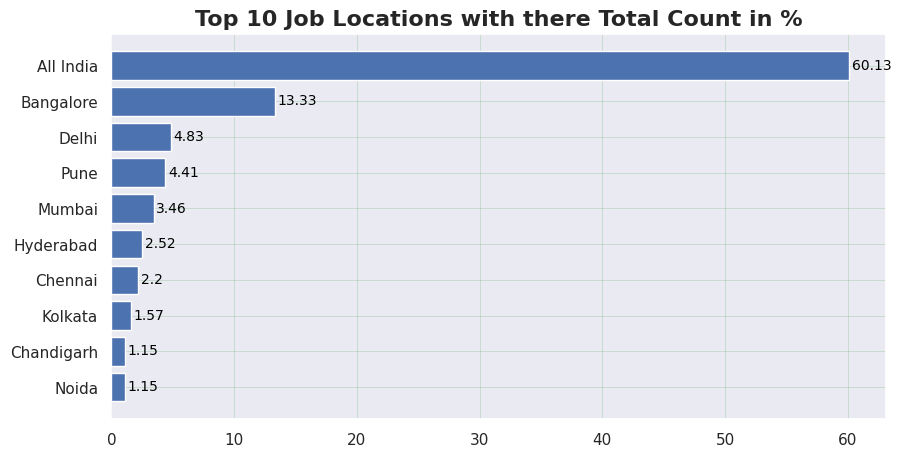

In [ ]:
# Let's visualize these information using horizontal bar graph

# Figure Size
fig, ax = plt.subplots(figsize = (10, 5))

# Horizontal Bar Plot
ax.barh(job_locations.Locations, job_locations['Total_Count_in_%'])

# Add x, y gridlines
ax.grid(color ='green', linestyle ='-', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, color = 'black')

# Add Plot Title
ax.set_title('Top 10 Job Locations with there Total Count in %', fontweight = "bold", size = 16)

# Show Plot
plt.show()


#####  What is/are the insight(s) found from the chart?

The preceding chart indicates that '**Bangalore**' accounts for the majority of the places mentioned in job listings ( **37%**). Bangalore is referred regarded as the "Silicon Valley of India" since it is a significant semiconductor hub and the country's top software exporter.

'**All India**' with **13%** comes in second; this indicates that, should the applicant be chosen, they can be assigned to any location in India where the company has operations..

'**Mumbai**' & '**Pune**' come in third with **11%** & **9%**, respectively. The two largest and most important metropolitan areas in Maharashtra and India, respectively, are Mumbai and Pune. Pune is regarded as the '**Queen of the Deccan**' and Mumbai as the '**Financial Capital of India**' because of their respective rich cultural legacies.

'**Delhi**' & '**Kolkata**' have the lowest percentage of job listings among all the places shown in the above figure, at **1.5%** & **1%**, respectively.

### **Chart-2**: What different companies are present in the dataset? and Which companies has the large no. of job postings?

In [ ]:
# Let's find out different company names and their total count in percentage(%)

company_names = df['Company Name'].value_counts(normalize=True).reset_index()
company_names.columns = ['Company_Name', 'Total_Count_in_%']
company_names['Total_Count_in_%'] = round(100 * company_names['Total_Count_in_%'], 2)
company_names


,Company_Name,Total_Count_in_%
0,Alphacom Systems and Solutions Pvt,28.96
1,DOMNIC LEWIS PRIVATE LIMITED,10.07
2,NTT Global Delivery Services Limite,5.14
3,Nokia Solutions and Networks India,5.14
4,Schneider Electric,5.14
5,JPMorgan,5.14
6,PFIZER LIMITED,5.14
7,IBM India Pvt Limited,5.14
8,Kankei Relationship Marketing Servi,5.04
9,Amazon,5.04


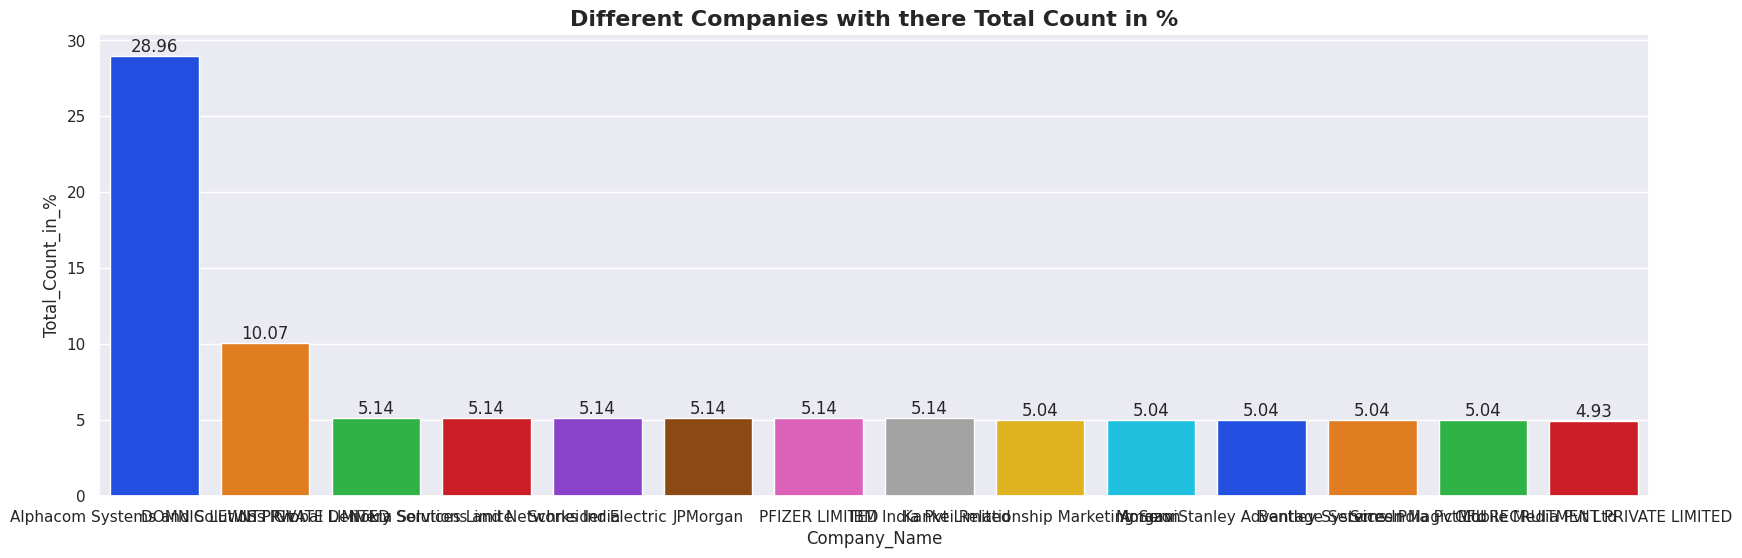

In [ ]:
# Let's visualize the above data with the help of bar chart

# Set the size of the chart
plt.figure(figsize = (20,6))

# Use sns barplot to plot
ax = sns.barplot(x = 'Company_Name', y = 'Total_Count_in_%', data = company_names, errwidth = 0, palette = 'bright')

# Simply assign the bar values to each bar
ax.bar_label(ax.containers[0])

# Add title to the chart
plt.title('Different Companies with there Total Count in %', fontweight = "bold", size = 16)

# Display plot
plt.show()


#####  What is/are the insight(s) found from the chart?

'**Accenture**' is the company with the most job listings, accounting for **44%** of all job ads in the dataset. Accenture is a multinational professional services firm with a focus on strategy and consulting that was founded in 1989. In terms of personnel, it is also the biggest consulting firm globally.

Name of the company: **Fiserv India Pvt Ltd**with **25%** of the shares, and **GFL RECRUITMENT PRIVATE LIMITED** comes in second.' comes in third place with a total share of **15.5%**.

Next, with 5% of the job posting share each, are **Siemens Limited**, **Bajaj Finserv Lending Ltd**, and **Mercede**.

The majority of these businesses are either service-oriented, consulting organizations, or offer end-to-end fin-tech goods and services.

### **Chart-3**: How much experience is required while applying for job? and What are different experience categories?

***How much experience is required while applying for job***?

In [ ]:
# Let's first find out job experience requried (in numbers) and their total count in percentage(%)

job_experience = df['Experience'].value_counts(normalize=True).reset_index()
job_experience.columns = ['Experience_Number', 'Total_Count_in_%']
job_experience['Total_Count_in_%'] = round(100 * job_experience['Total_Count_in_%'], 2)
job_experience


,Experience_Number,Total_Count_in_%
0,0,21.20
1,5,17.31
2,3,15.22
3,2,12.70
4,1,12.49
5,4,6.51
6,8,5.14
7,6,4.72
8,7,4.41
9,9,0.31


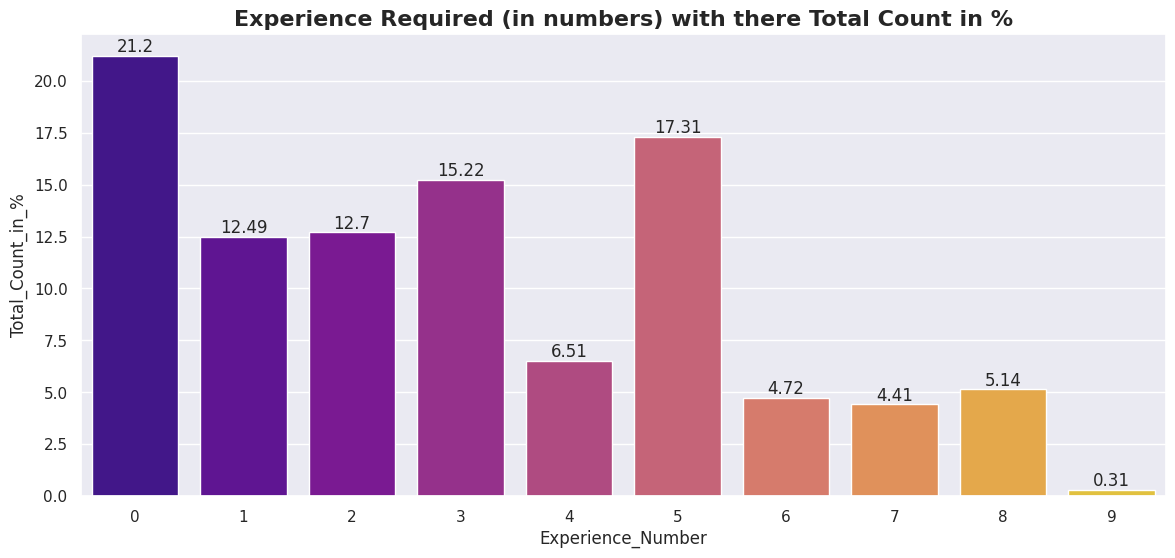

In [ ]:
# Let's visualize the above data with the help of bar graph

# Set the size of the chart
plt.figure(figsize = (14,6))

# Use sns barplot to plot
ax = sns.barplot(x = 'Experience_Number', y = 'Total_Count_in_%', data = job_experience, errwidth = 0, palette = 'plasma')

# Simply assign the bar values to each bar
ax.bar_label(ax.containers[0])

# Add title to the chart
plt.title('Experience Required (in numbers) with there Total Count in %', fontweight = "bold", size = 16)

# Display plot
plt.show()


*Experience_Number*:

* **0** -> No Experience /  Fresher,
* **1**-> 1 year of Experience,
* **2** -> 2 years of Experience,
* **3** -> 3 years of Experience, etc.

In [ ]:
# Now let's find out different job experience categories and their total count in percentage(%)

job_experience_categories = df['Experience_Category'].value_counts(normalize=True).reset_index()
job_experience_categories.columns = ['Experience_Categories', 'Total_Count_in_%']
job_experience_categories['Total_Count_in_%'] = round(100 * job_experience_categories['Total_Count_in_%'], 2)
job_experience_categories


,Experience_Categories,Total_Count_in_%
0,Medium Experience,64.22
1,Fresher,21.20
2,High Experience,14.59


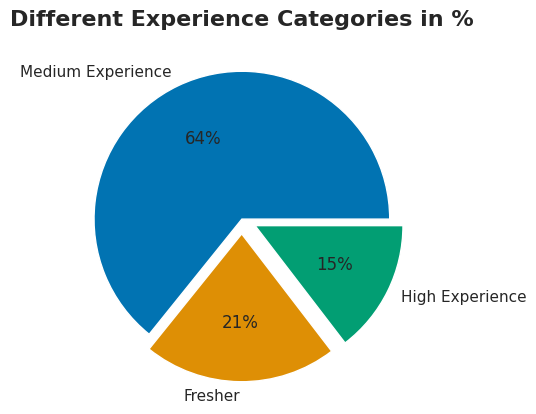

In [ ]:
# Let's see this data using Pie Chart

# Declaring exploding pie
explode = [0, 0.1, 0.1]

# Define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')

# Plotting data on chart
plt.pie(job_experience_categories['Total_Count_in_%'], labels = job_experience_categories['Experience_Categories'], colors = palette_color, explode = explode, autopct = '%.0f%%')

# Add title to the chart
plt.title('Different Experience Categories in %', fontweight = "bold", size = 16)

# Displaying chart
plt.show()


*Experience_Categories*:

* '**Freasher**' -> Zero Experience
* '**Medium Experience**' -> 1-6 years of Experience
* '**High Experience**' -> More than 6 years of Experience.

#####  What is/are the insight(s) found from the chart?

* The first chart (a bar chart) shows the numbers for "Job Experience Required":
* From the first graphic, it is clear that the majority of job positions are for candidates with **2/3 years** of experience or for freshmen with 0 years of experience. Because Freashers frequently possess traits and abilities like a solid educational foundation, a willingness to learn, creative ideas, and room for growth, the majority of MNCs choose to work with them. Additionally, individuals with **9 years** or more of experience are likely to receive the fewest employment openings.
* Pie chart for job experience categories is the second chart.
* According to the second figure, the majority of employers favor applicants with '**Medium Experience**', which denotes experience ranging from 1 to 6 year of range

* The above chart can be split into the following two categories:

    **Fresher** => **16%** and **Experienced** => **84%** are also included.
  * Because they possess the abilities, traits, and flexibility to adjust to changes, the majority of employers favor hiring people with little to no experience. An experienced worker might adapt to organizational changes without much help from their managers.



### **Chart-4**: Which company has how may vacancies available? and What are different vacancy categories? and Which Top 10 cities have the highest vacancies?

***Which company has how may vacancies available?***

In [ ]:
# First let's find out how many vacancies are available for each company

job_vacancies = df.groupby(['Company Name']).mean()['Total Vacancies'].astype(int).reset_index()
job_vacancies


<ipython-input-120-af1395c4e676>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_vacancies = df.groupby(['Company Name']).mean()['Total Vacancies'].astype(int).reset_index()


,Company Name,Total Vacancies
0,Alphacom Systems and Solutions Pvt,1
1,Amazon,1
2,Bentley Systems India Pvt Ltd,1
3,DOMNIC LEWIS PRIVATE LIMITED,1
4,GFL RECRUITMENT PRIVATE LIMITED,13
5,IBM India Pvt Limited,1
6,JPMorgan,1
7,Kankei Relationship Marketing Servi,1
8,Morgan Stanley Advantage Services P,1
9,NTT Global Delivery Services Limite,1


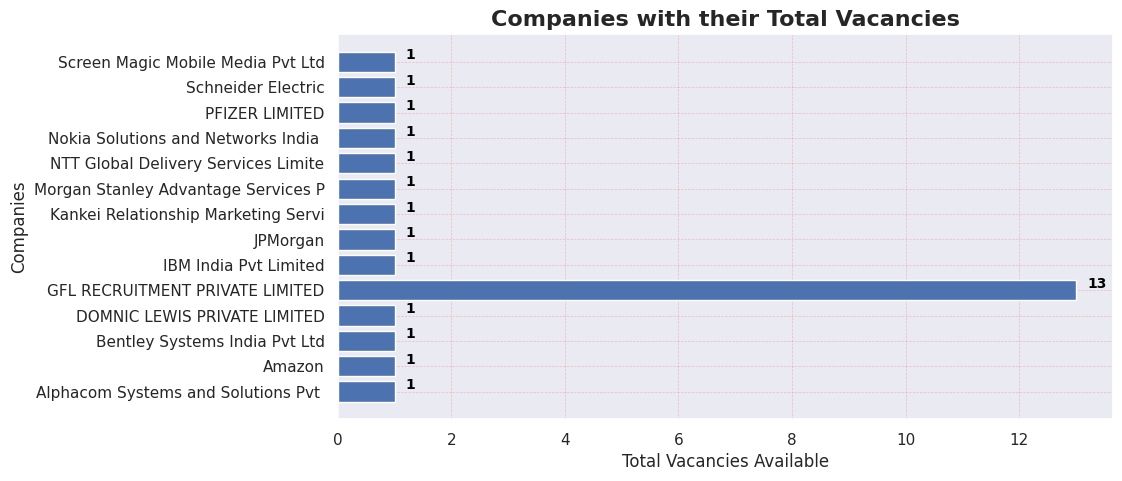

In [ ]:
# Let's visualize these data using horizontal bar graph

# Figure Size
fig, ax = plt.subplots(figsize = (10, 5))

# Horizontal Bar Plot
ax.barh(job_vacancies['Company Name'], job_vacancies['Total Vacancies'])

# Add x, y gridlines
ax.grid(color ='red', linestyle ='--', linewidth = 0.5, alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color = 'black')

# Add Plot Title
ax.set_title('Companies with their Total Vacancies', fontweight = "bold", size = 16)

# Set axes and title label
plt.xlabel('Total Vacancies Available')
plt.ylabel('Companies')

# Show Plot
plt.show()


***What are different vacancy categories?***

In [ ]:
# Now let's find out different vacancy categories along with their total count in percentage(%)

job_vacancies_categories = df['Vacancy_Category'].value_counts(normalize=True).reset_index()
job_vacancies_categories.columns = ['Vacancy_Categories', 'Total_Count_in_%']
job_vacancies_categories['Total_Count_in_%'] = round(100 * job_vacancies_categories['Total_Count_in_%'], 2)
job_vacancies_categories


,Vacancy_Categories,Total_Count_in_%
0,Single Vacancy,95.07
1,High Vacancies,4.93


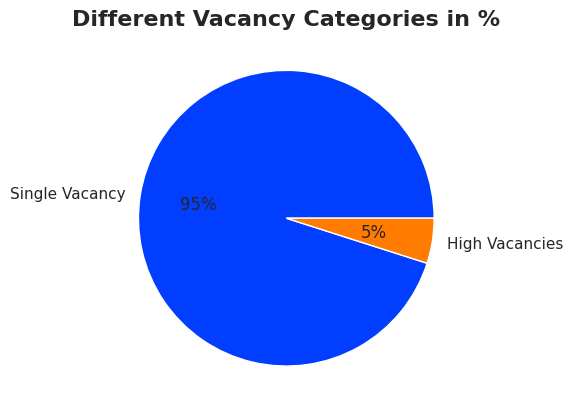

In [ ]:
# Let's visualize this data using Pie Chart

# Define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Plotting data on chart
plt.pie(job_vacancies_categories['Total_Count_in_%'], labels = job_vacancies_categories['Vacancy_Categories'], colors = palette_color, autopct = '%.0f%%')

# Add title to the chart
plt.title('Different Vacancy Categories in %', fontweight = "bold", size = 16)

# Displaying chart
plt.show()


*Vacancy_Category*:
* **Single Vacancy** -> 1 job available,
* **Medium Vacancy** -> 2-10 jobs available, and
* **High Vacancy** -> More than 10 jobs available.

***Which Top 10 cities have the highest vacancies?***

In [ ]:
# Now let's find out total vacancies available for each city along with their total count

job_vacancies_cities = df.groupby(['Job Location']).count()['Total Vacancies'].astype(int).reset_index().sort_values(by = ['Total Vacancies'], ascending = False)
job_vacancies_cities


,Job Location,Total Vacancies
1,All India,573
2,Bangalore,127
5,Delhi,46
19,Pune,42
15,Mumbai,33
8,Hyderabad,24
4,Chennai,21
11,Kolkata,15
3,Chandigarh,11
18,Noida,11


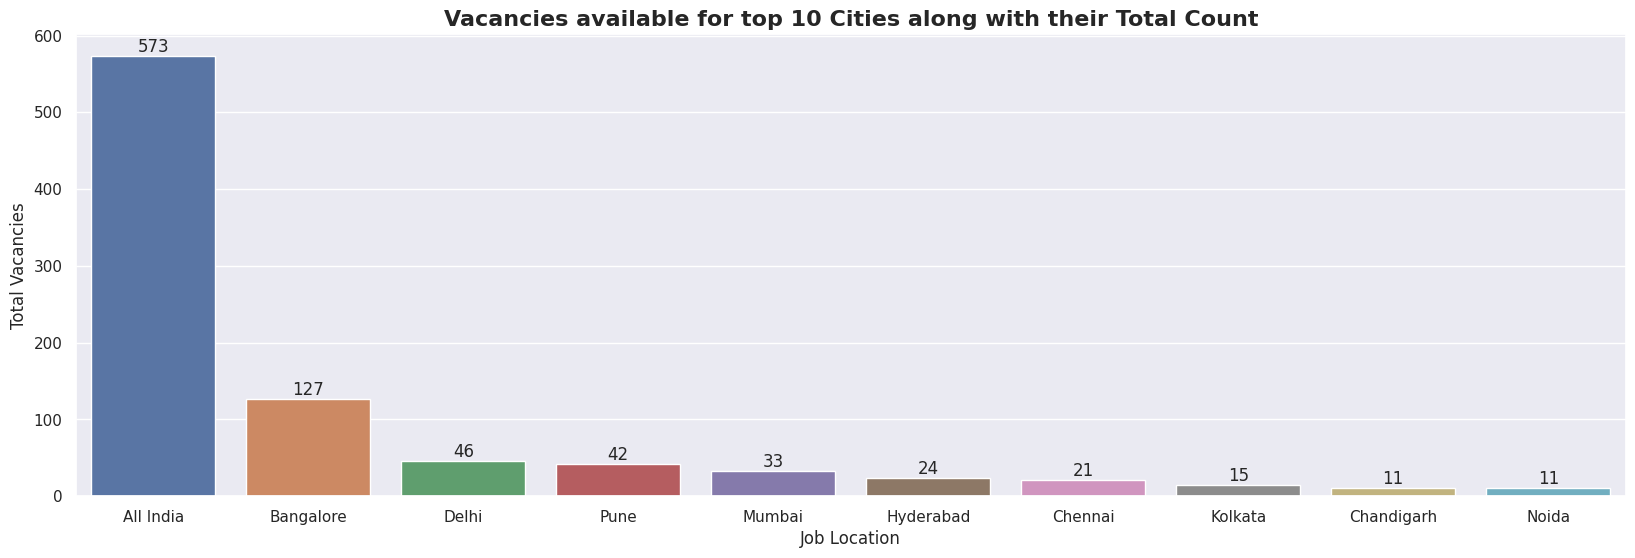

In [ ]:
# Finally let's visualize the above data with the help of bar graph

# Set the size of the chart
plt.figure(figsize = (20,6))

# Use sns barplot to plot
ax = sns.barplot(x = 'Job Location', y = 'Total Vacancies', data = job_vacancies_cities.head(10), errwidth = 0, palette = 'deep')

# Simply assign the bar values to each bar
ax.bar_label(ax.containers[0])

# Add title to the chart
plt.title('Vacancies available for top 10 Cities along with their Total Count', fontweight = "bold", size = 16)

# Display plot
plt.show()


#####  What is/are the insight(s) found from the chart?

* From the first graph (a horizontal bar graph with the title Total vacancies for each company):
The companies "**QUISCON BIOTECH**" and "**Clyent Technologies**" have the most
open positions.**Alpine Manpower Services**', '**Manish Enterprises**', and '**Merck Ltd**' have the fewest open positions, each with one.


* From the second graph (the pie graph) with the various job vacancy categories:
Drawing conclusions from the preceding graph, we see that the majority of job posts feature '**Single Vacancy**', indicating that only one candidate will be chosen for the required position.Additionally, 21% of all job advertisements contain more than one available position.

**Moderate Occupancy** -> 10%

**High Availability** -> 11%

* From the third graph (a bar graph showing the available positions per city): "**Bangalore**" has the most number of open positions, followed by **Pune** and **Mumbai**.**', '**hyderbad**', '**gurugram**', and '**chennai**'

These cities are mostly called the '**Tech Cities of India**' and many tech-savvy candidates prefer these cities for their tech career.

### **Chart-5**: Which company prefer what amount of average experience from candidates?

In [ ]:
# Let's find out average experience requried in different experience categories for each company

company_experience = df.groupby(['Company Name', 'Experience_Category']).mean()['Experience'].astype(int).reset_index()
company_experience


<ipython-input-126-1fed308ad018>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  company_experience = df.groupby(['Company Name', 'Experience_Category']).mean()['Experience'].astype(int).reset_index()


,Company Name,Experience_Category,Experience
0,Alphacom Systems and Solutions Pvt,Fresher,0
1,Alphacom Systems and Solutions Pvt,High Experience,7
2,Alphacom Systems and Solutions Pvt,Medium Experience,2
3,Amazon,Fresher,0
4,Amazon,High Experience,7
5,Amazon,Medium Experience,2
6,Bentley Systems India Pvt Ltd,Fresher,0
7,Bentley Systems India Pvt Ltd,High Experience,7
8,Bentley Systems India Pvt Ltd,Medium Experience,3
9,DOMNIC LEWIS PRIVATE LIMITED,Fresher,0


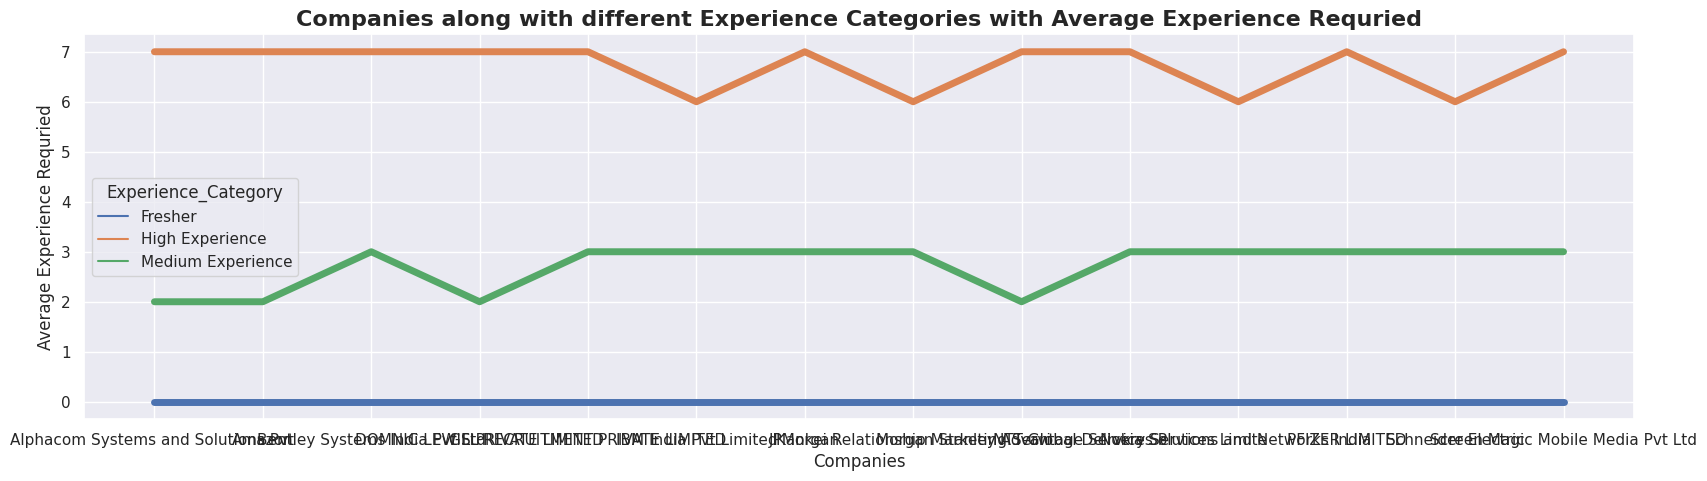

In [ ]:
# Let's visualize these table using Line plot

# Set the size of the figure
fig = plt.subplots(figsize=(20, 5))

# Line Plot
ax = sns.lineplot(x = 'Company Name', y = 'Experience', data = company_experience, hue = 'Experience_Category', lw = 5)

# Set the theme of plot
sns.set_theme(style = 'darkgrid')

# Set axes and title label
plt.xlabel('Companies')
plt.ylabel('Average Experience Requried')
plt.title('Companies along with different Experience Categories with Average Experience Requried', fontweight = "bold", size = 16)

# Display plot
plt.show()


*Experience_Category*:
* **Fresher** -> 0 years of experience,
* **Medium Experience** -> 1-6 years of experience, and
* **High Experience** -> more than 6 years of experience.

#####  What is/are the insight(s) found from the chart?

* Based on the data above, applicants classified as having "**Medium Experience**" must have at least **2–3 years** of experience in order to be hired.

* Additionally, applicants who fall into the "**High Experience**" group must have at least **6-7 years** of experience in order to be hired by a certain organization.

* Candidates with 2-3 years of experience are typically chosen for "**senior-level roles**" in firms, while those with 6-7 years of experience are chosen for "**managerial-level roles**".

# **Conclusion**

We have conducted **in-depth analysis on the data science employment market** for this project in order to provide insights that will help employers and job seekers comprehend the industry's dynamic shifts. In order to obtain information, the project conducts the following actions:

* ***Web Scraping***: In this step, we first send a request to the specified URL in order to obtain the HTML content. Next, we parse the HTML in order to extract the relevant data, such as job title, location, companies, experience, openings, etc., and store the data in a tabular format (dataframe).

* ***Data Wrangling***: We carry out a number of data wrangling tasks in these steps, including discovering unique values, adding additional columns, altering datatypes, and eliminating duplicates.


* ***Spatial Display***: Finally, to better understand the data, we have produced a number of charts and graphs along with detailed insights.